# explore the dataset 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

In [33]:
#read in csv export of Business Analyst data at block group level
data = pd.read_csv("BA_BG2.txt")
dataID = data[["ID","X4009_X"]]
#data

In [ ]:
#read in csv export of GIS Zonal Statistic data at block group level
#data2 = pd.read_csv("BG_ZS.txt")
data2 = pd.read_csv("ZS.csv")
#data2

In [ ]:
#table visualization to aid in sorting/indexing
data['ID'] = data['ID'].astype(str)
data2['GEOID'] = data2['GEOID'].astype(str)

In [ ]:
data.sort_values("ID").head()

In [17]:
data.iloc[177408,:4]

OBJECTID            177409
ID            100010401001
NAME            1.0001e+08
STATE_NAME        Delaware
Name: 177408, dtype: object

In [19]:
data.iloc[177408,2]

100010401.001

In [21]:
# from above sample we can see that ID should represent a dealer.
#lets check how many dealer involved in thsi case


size_dealer = len(data["ID"].unique())
size_dealer

217195

In [23]:
size_dealer/data.shape[0]
# on obs represent for one dealer

1.0

In [6]:
data2.sort_values("GEOID").head()

FID    Shape  STATEFP  COUNTYFP  TRACTCE  BLKGRPCE         GEOID  \
39163  39163  Polygon       10         1    40100         1  100010401001   
39168  39168  Polygon       10         1    40100         2  100010401002   
39176  39176  Polygon       10         1    40100         3  100010401003   
39482  39482  Polygon       10         1    40201         1  100010402011   
39483  39483  Polygon       10         1    40201         2  100010402012   

            NAMELSAD  MTFCC FUNCSTAT   ...    AWATER   INTPTLAT   INTPTLON  \
39163  Block Group 1  G5030        S   ...         0  39.269885 -75.702384   
39168  Block Group 2  G5030        S   ...         0  39.229026 -75.700297   
39176  Block Group 3  G5030        S   ...         0  39.199270 -75.676583   
39482  Block Group 1  G5030        S   ...     37235  39.289342 -75.652212   
39483  Block Group 2  G5030        S   ...         0  39.302134 -75.614206   

         result      mean  median  min  max      std     sum  
39163   5.79091   5.79091       0    0   90  21.6590  310005  
39168   5.45673   5.45673       0    0   90  21.0064  244025  
39176   5.27653   5.27653       0    0   90  20.7286  190810  
39482  25.03200  25.03200       0    0   90  36.6446  218755  
39483  47.63970  47.63970      65    0   90  32.4533   85275  

[5 rows x 21 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217195 entries, 0 to 217194
Columns: 2179 entries, OBJECTID to Shape_Area
dtypes: float64(1450), int64(726), object(3)
memory usage: 3.5+ GB


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215880 entries, 0 to 215879
Data columns (total 21 columns):
FID         215880 non-null int64
Shape       215880 non-null object
STATEFP     215880 non-null int64
COUNTYFP    215880 non-null int64
TRACTCE     215880 non-null int64
BLKGRPCE    215880 non-null int64
GEOID       215880 non-null object
NAMELSAD    215880 non-null object
MTFCC       215880 non-null object
FUNCSTAT    215880 non-null object
ALAND       215880 non-null int64
AWATER      215880 non-null int64
INTPTLAT    215880 non-null float64
INTPTLON    215880 non-null float64
result      215880 non-null float64
mean        215880 non-null float64
median      215880 non-null int64
min         215880 non-null int64
max         215880 non-null int64
std         215880 non-null float64
sum         215880 non-null int64
dtypes: float64(5), int64(11), object(5)
memory usage: 34.6+ MB


In [2]:
#Uses a left inner join to combine the datasets on "geoid" containing only match records
#This removes outlieing areas suchs as Alaska, Hawaii, PR, etc.

#references to cells used in join
#baid = data["ID"]
#zsid = data2["GEOID"]
#IDS = pd.concat([zsid,baid],axis=1)
#IDS

#all_data = data.merge(data2, left_on="ID", right_on="GEOID", how="inner")
#all_data
#all_data.to_csv("all_data.csv")
all_data = pd.read_csv("all_data.csv", index_col=0)

In [3]:
#Creates a smaller joined data set on columns with a priori knowledge
#all_small = all_data[["GEOID","ID","X4009_X","X4010_X","X4011_X","X4012_X","AREA","ALAND","mean","median","std","sum"]]
#all_small
#all_small.to_csv("all_small.csv")

all_small = pd.read_csv("all_small.csv", index_col=0)

In [4]:
all_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215307 entries, 0 to 215306
Data columns (total 12 columns):
GEOID      215307 non-null int64
ID         215307 non-null int64
X4009_X    215307 non-null float64
X4010_X    215307 non-null float64
X4011_X    215307 non-null float64
X4012_X    215307 non-null float64
AREA       215307 non-null float64
ALAND      215307 non-null int64
mean       215307 non-null float64
median     215307 non-null int64
std        215307 non-null float64
sum        215307 non-null int64
dtypes: float64(7), int64(5)
memory usage: 21.4 MB


In [5]:
# find in the read in dataset, GEOID and ID turn to int, so we should change them to string
all_small['ID'] = all_small['ID'].astype(str)
all_small['GEOID'] = all_small['GEOID'].astype(str)

all_data['ID'] = all_data['ID'].astype(str)
all_data['GEOID'] = all_data['GEOID'].astype(str)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


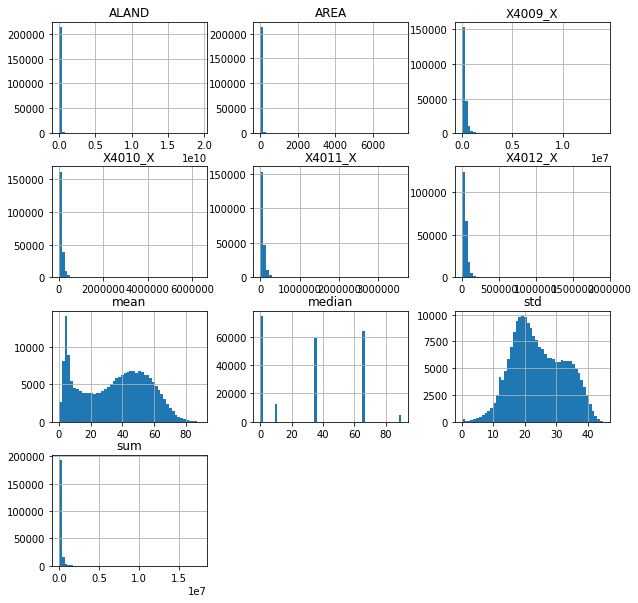

In [25]:


fig = plt.figure(figsize = (10,10))
ax = fig.gca()
plt.subplots_adjust(wspace=0.1, hspace=1)
all_small.hist(ax = ax,bins =50)
plt.show()

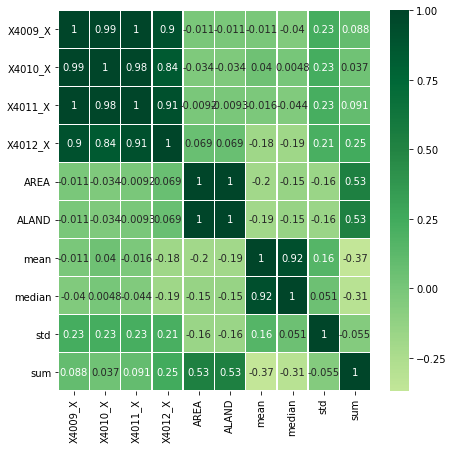

In [18]:
# correlation matrix visual on small data set
import seaborn as sns
plt.figure(figsize =(7,7))
sm_corr_mat = all_small.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(sm_corr_mat, cmap='YlGn',  center=0, linewidths=.5,annot = True)
plt.show()

In [8]:
#Creates correlation matrix table from just the _X business analyst data

#xcol = [col for col in all_data.columns if '_X' in col]
#print(xcol)

xdata = all_data.filter(regex='_X')
valdata = xdata.filter(regex='X4')
#print(valdata)

corr_mat = valdata.select_dtypes(include=['float64','int64']).corr()
corr_mat

X4033_X   X4034_X   X4035_X   X4036_X   X4037_X   X4038_X   X4039_X  \
X4033_X  1.000000  0.998678  0.998234  0.998419  0.999875  0.998530  0.998802   
X4034_X  0.998678  1.000000  0.999672  0.999615  0.998408  0.998550  0.996266   
X4035_X  0.998234  0.999672  1.000000  0.998575  0.998082  0.999219  0.995224   
X4036_X  0.998419  0.999615  0.998575  1.000000  0.998021  0.997085  0.996657   
X4037_X  0.999875  0.998408  0.998082  0.998021  1.000000  0.998352  0.999145   
X4038_X  0.998530  0.998550  0.999219  0.997085  0.998352  1.000000  0.995125   
X4039_X  0.998802  0.996266  0.995224  0.996657  0.999145  0.995125  1.000000   
X4040_X  0.998208  0.994256  0.993449  0.994393  0.997746  0.995363  0.997424   
X4041_X  0.997373  0.994272  0.992329  0.995639  0.996706  0.993034  0.997315   
X4042_X  0.994554  0.989382  0.990236  0.987725  0.994394  0.993902  0.992718   
X4043_X  0.996568  0.994440  0.992927  0.995341  0.995707  0.993498  0.995264   
X4044_X  0.994194  0.993011  0.992192  0.993163  0.992907  0.993314  0.990586   
X4045_X  0.991084  0.994989  0.994979  0.994262  0.989833  0.993803  0.984951   
X4046_X  0.993182  0.993712  0.993252  0.993475  0.991864  0.993821  0.988429   
X4109_X  0.974388  0.966482  0.963525  0.968970  0.973015  0.965809  0.976220   
X4048_X  0.992574  0.988140  0.987089  0.988548  0.991421  0.990039  0.990391   
X4049_X  0.988990  0.985356  0.985311  0.984675  0.987825  0.989213  0.984807   
X4052_X  0.994386  0.993693  0.992277  0.994491  0.993170  0.992605  0.991548   
X4053_X  0.996246  0.996516  0.994828  0.997606  0.995252  0.993946  0.994159   
X4054_X  0.989449  0.993825  0.992764  0.994237  0.988327  0.989867  0.985199   
X4055_X  0.990134  0.989331  0.988227  0.989794  0.988559  0.989407  0.985928   
X4056_X  0.996524  0.992080  0.990965  0.992552  0.996233  0.993280  0.996325   
X4057_X  0.990321  0.991710  0.990905  0.991848  0.988806  0.990730  0.985400   
X4058_X  0.984318  0.980344  0.979251  0.980802  0.982890  0.982571  0.981111   
X4059_X  0.976132  0.982512  0.982423  0.981880  0.974703  0.980716  0.968380   
X4060_X  0.969739  0.960160  0.956033  0.963919  0.968394  0.959608  0.972746   
X4061_X  0.992823  0.991545  0.989956  0.992531  0.991653  0.989903  0.990888   
X4062_X  0.970814  0.961751  0.962181  0.960573  0.969752  0.970226  0.967429   
X4063_X  0.994992  0.991697  0.989405  0.993445  0.995208  0.988681  0.997878   
X4064_X  0.981959  0.976066  0.971641  0.980136  0.981919  0.970781  0.987938   
...           ...       ...       ...       ...       ...       ...       ...   
X4001_X  0.993872  0.990186  0.988972  0.990767  0.992985  0.990853  0.992493   
X4002_X  0.976595  0.974051  0.973387  0.974048  0.975340  0.975568  0.973182   
X4003_X  0.972260  0.970969  0.970036  0.971261  0.971133  0.970838  0.969362   
X4108_X  0.945376  0.939371  0.940680  0.937257  0.944034  0.946667  0.940209   
X4006_X  0.975651  0.976179  0.974391  0.977392  0.974614  0.973197  0.973644   
X4007_X  0.915337  0.902028  0.903801  0.899440  0.913080  0.917891  0.907749   
X4008_X  0.996279  0.992092  0.990634  0.992936  0.995564  0.992367  0.995834   
X4009_X  0.984904  0.977035  0.973949  0.979654  0.985164  0.975505  0.990112   
X4010_X  0.971235  0.961427  0.957349  0.965133  0.970059  0.960396  0.975039   
X4011_X  0.988755  0.982515  0.979543  0.985006  0.989000  0.980434  0.993152   
X4012_X  0.882418  0.878845  0.877160  0.880018  0.887587  0.872269  0.896810   
X4013_X  0.988515  0.981029  0.979670  0.981774  0.987764  0.984180  0.988329   
X4014_X  0.950650  0.939585  0.938099  0.940499  0.953420  0.940451  0.960817   
X4015_X  0.976503  0.972178  0.967181  0.976870  0.975287  0.965604  0.980272   
X4016_X  0.967016  0.956918  0.953980  0.959391  0.965404  0.958194  0.968627   
X4017_X  0.979842  0.981383  0.977853  0.984480  0.979823  0.972421  0.983155   
X4018_X  0.977027  0.970976  0.969328  0.972042  0.975386  0.972491  0.975480   
X4019_X  0.648969  0.655906  0.670471  0.

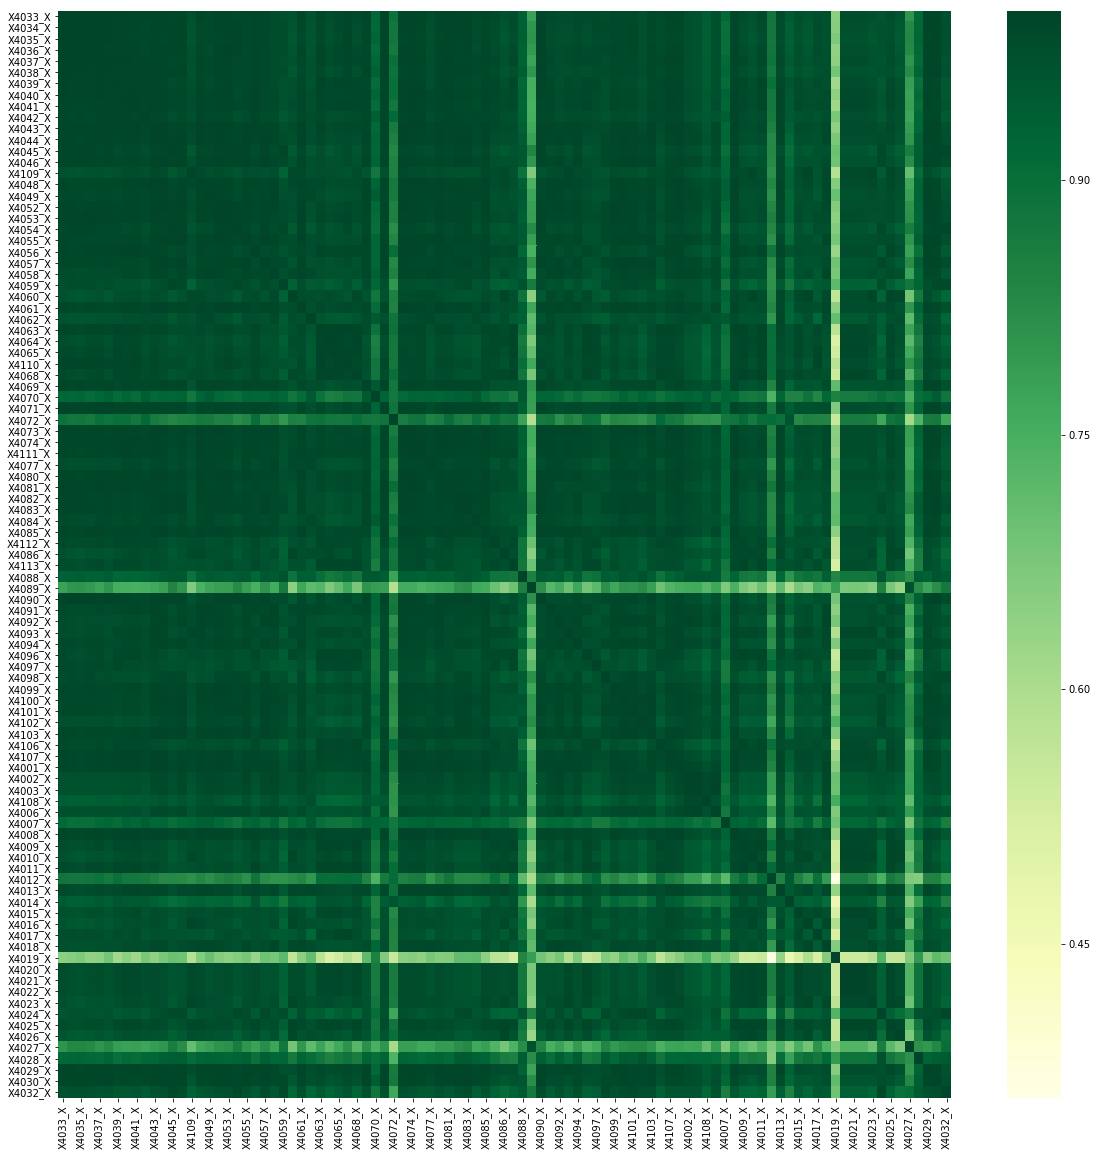

In [9]:
# correlation matrix visual on larger data set

import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(20,20))
sns.heatmap(corr_mat, cmap='YlGn')
plt.show()

#corr_mat = all_data.select_dtypes(include=['float64','int64']).corr()
#corr_mat
#sns.heatmap(corr_mat, cmap='YlGn',  center=0, linewidths=.5)
#plt.show()

X4089_X,X4019_X are show the negative correlation with other spending.The correlation paramter are negative related to the rest of the features. 

### Check the subcategories for Lawn spending.

In [7]:
X4009data = all_data.filter(regex='X4009_')
X4009data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215307 entries, 0 to 215306
Data columns (total 3 columns):
X4009_X    215307 non-null float64
X4009_A    215307 non-null float64
X4009_I    215307 non-null int64
dtypes: float64(2), int64(1)
memory usage: 6.6 MB


In [8]:
X4009data.head()

X4009_X  X4009_A  X4009_I
0  294818.0   377.01       88
1  283090.0   430.88      100
2  323664.0   307.67       72
3  278477.0   205.97       48
4   82510.0   277.81       65

In [21]:
ratio = X4009data['X4009_A']/X4009data['X4009_I']

In [24]:
ratio.describe()
# though those two ratio are almost the same(range from 4.28 to 4.31)
#here I am confused that how they get the ratio?

count    214263.000000
mean          4.299446
std           0.019975
min           4.082500
25%           4.287976
50%           4.299359
75%           4.310816
max           4.787500
dtype: float64

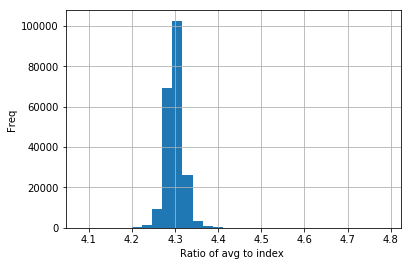

In [32]:
ratio.hist(bins =30)
plt.xlabel("Ratio of avg to index ")
plt.ylabel("Freq")
plt.show()

In [12]:
### check the sale according to the state level
state_spending = all_data.groupby("STATE_NAME")[["X4009_X",
"X4009_A","X4009_I"]]


In [5]:
all_data[["X4009_X",
"X4009_A","X4009_I"]].describe()
# describe the Lawn and Garden Spending by all data

X4009_X        X4009_A        X4009_I
count  2.153070e+05  215307.000000  215307.000000
mean   2.476724e+05     417.812298      97.179506
std    2.324831e+05     236.541582      55.017331
min    0.000000e+00       0.000000       0.000000
25%    1.116405e+05     262.740000      61.000000
50%    1.840060e+05     371.350000      86.000000
75%    3.078960e+05     510.960000     119.000000
max    1.395972e+07    2123.960000     494.000000

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


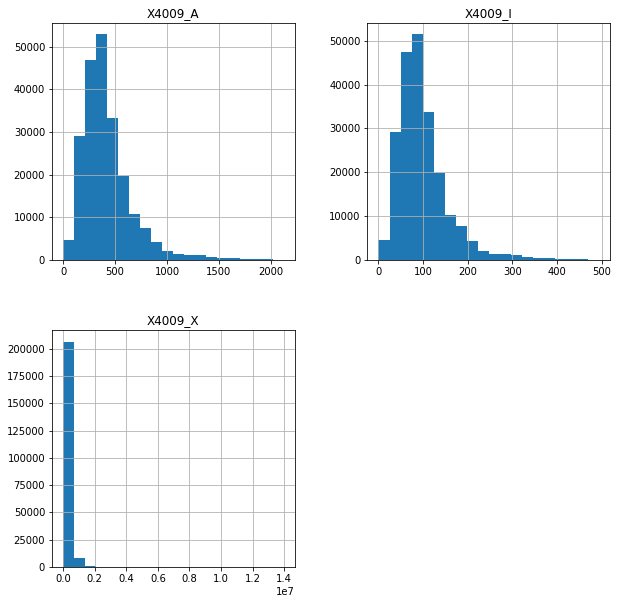

In [6]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
plt.subplots_adjust(wspace=0.1, hspace=1)
tmp = all_data[["X4009_X",
"X4009_A","X4009_I"]]
tmp.hist(ax =ax,bins = 20)
plt.show()

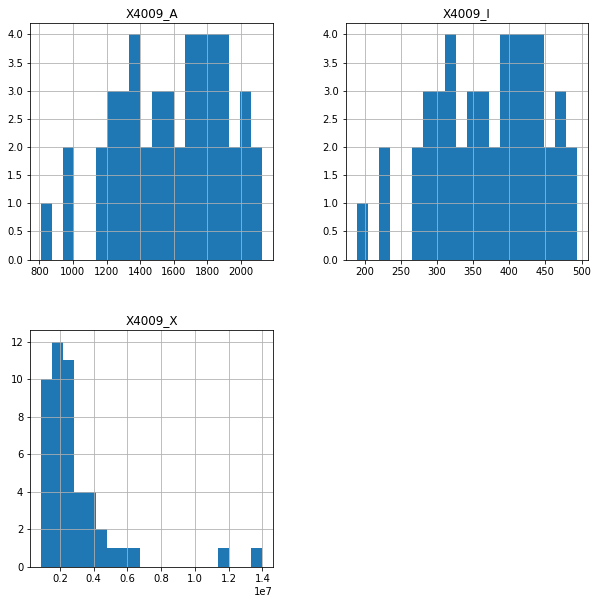

In [13]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
plt.subplots_adjust(wspace=0.1, hspace=1)
state_spending.max().hist(ax =ax,bins = 20)
plt.show()

In [ ]:
des =  all_data.groupby("STATE_NAME")[["X4009_X",
"X4009_A","X4009_I"]].describe()
des["X4009_A"]

<Figure size 1440x576 with 0 Axes>

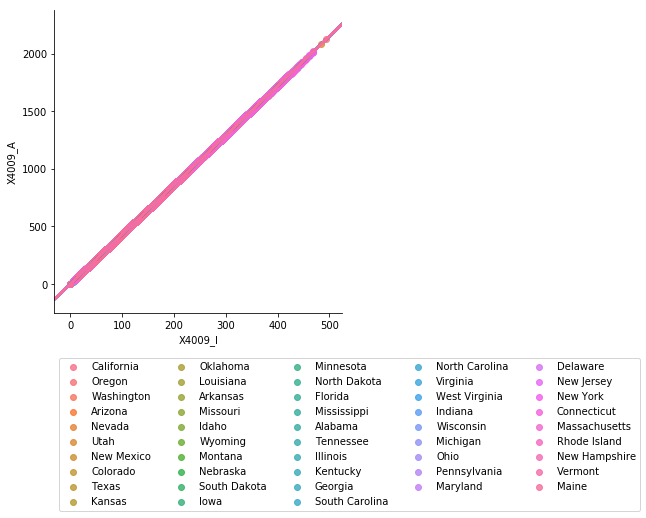

In [16]:
# fig = plt.figure(figsize = (10,10))
# ax = fig.gca()
# plt.subplots_adjust(wspace=0.1, hspace=1)
# state_spending.max().plot.scatter(ax =ax)
# plt.show()
# [["X4009_X",
# "X4009_A","X4009_I"]]
# Use the 'hue' argument to provide a factor variable

plt.figure(figsize = (20,8))
sns.lmplot(  x="X4009_I", y="X4009_A",data = all_data, fit_reg=True, hue='STATE_NAME',legend = False)

# Put a legend to the right of the current axis
plt.legend(ncol =5,loc='center left', bbox_to_anchor=(0, -0.4))
plt.show()


In [61]:
# !pip install colorlover
?choropleth()

Object `choropleth` not found.


In [3]:

def plot_state(all_data= all_data,Type = "mean",var = "X4009_X",save = True):

    import os
    import pandas as pd
    import folium
    import json
    state_geo = os.path.join('data', 'us-states.json')
    us_state_abbrev = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY',
    }
    if Type == "mean":
        state_mean= all_data.groupby("STATE_NAME")[[var,"STATE_NAME"]].mean()
    elif Type == "count":
        state_mean= all_data.groupby("STATE_NAME")[[var,"STATE_NAME"]].count()
    else:
        state_mean= all_data.groupby("STATE_NAME")[[var,"STATE_NAME"]].sum()
        
    state_mean["State"]=([us_state_abbrev[S] for S in state_mean.index.values])
    state_geo = os.path.join('data', 'us-states.json')
    pd.options.display.float_format = '{:.3E}'.format
    map = folium.Map(location=[35, -102], zoom_start=4)
    map.choropleth( geo_data=state_geo,
     name='choropleth',
     data=state_mean,
     columns=['State',var],
     key_on='feature.id',
     fill_color= 'YlGnBu',
     fill_opacity=0.7,
     line_opacity=0.5,
     legend_name=var+" "+"state"+ " "+Type
    )
    if save==True:
        map.save( var+Type + '_chloropleth_USA1.html')
    return(map)


In [175]:
all_data.head()

OBJECTID           ID          NAME  STATE_NAME ST_ABBREV      AREA  \
0       851  60790110011  6.079011e+07  California        CA  0.209676   
1       852  60790111031  6.079011e+07  California        CA  0.682115   
2       853  60790111032  6.079011e+07  California        CA  1.241856   
3       854  60790113001  6.079011e+07  California        CA  1.268712   
4       855  60790113004  6.079011e+07  California        CA  0.516538   

    X2001_X  X2001_A  X2001_I   X2002_X   ...    AWATER   INTPTLAT  \
0  419704.0   536.71       96  262798.0   ...         0  35.262532   
1  430624.0   655.44      117  267363.0   ...         0  35.262354   
2  460770.0   437.99       78  288510.0   ...         0  35.253040   
3  491187.0   363.30       65  300907.0   ...         0  35.250687   
4  145537.0   490.02       87   89158.0   ...         0  35.254460   

     INTPTLON    result      mean  median  min  max      std     sum  
0 -120.639273  27.48680  27.48680      35   10   90  14.0824    5195  
1 -120.664669  38.03570  38.03570      35   10   90  16.1838    6390  
2 -120.658019  58.30110  58.30110      65    0   90  20.4907   33115  
3 -120.694039  46.09260  46.09260      35   10   90  16.7805   19405  
4 -120.682117   7.57191   7.57191       0    0   90  24.8433  627795  

[5 rows x 2200 columns]

In [11]:
plot_state(Type= "sum")

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [161]:
plot_state()


In [157]:
plot_state(Type= "count")

In [159]:
plot_state(var = "X4009_A")

In [160]:
plot_state(var = "X4009_I")

from the above plot ,we can see that the average spending and index show the identity distribution among the state level data.
CA has the most records. But for the mean spending,CA,WA,NJ are the top.

In [6]:
#Same procudure as above but with a change in time column

#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#data = pd.read_csv("BA_BG2.txt")
#bg08 = pd.read_csv("BG_08_ZS.txt")
#bg08
#dif08_data = data.merge(bg08, left_on="ID", right_on="GEOID", how="inner")
#dif08_data.to_csv('dif08_data.csv',index = False)
dif08_data= pd.read_csv('dif08_data.csv')
#dif08_data

#small08 = dif08_data[["GEOID","ID","X4009_X","X4010_X","X4011_X","X4012_X","AREA","ALAND","result","mean","median","std","sum","Diff"]]
#small08
#small08.to_csv('small08.csv',index = False)
small08= pd.read_csv('small08.csv')

In [7]:
plot_state(dif08_data)

In [67]:
plot_state(dif08_data,var = "X4009_A")

In [9]:
plot_state(dif08_data,var = "X4009_I")

In [10]:
plot_state(dif08_data ,var = "X4009_A",Type = "count")

In [11]:
small08 ['ID'] = small08['ID'].astype(str)
small08 ['GEOID'] = small08 ['GEOID'].astype(str)

dif08_data['ID'] = dif08_data['ID'].astype(str)
dif08_data['GEOID'] = dif08_data['GEOID'].astype(str)


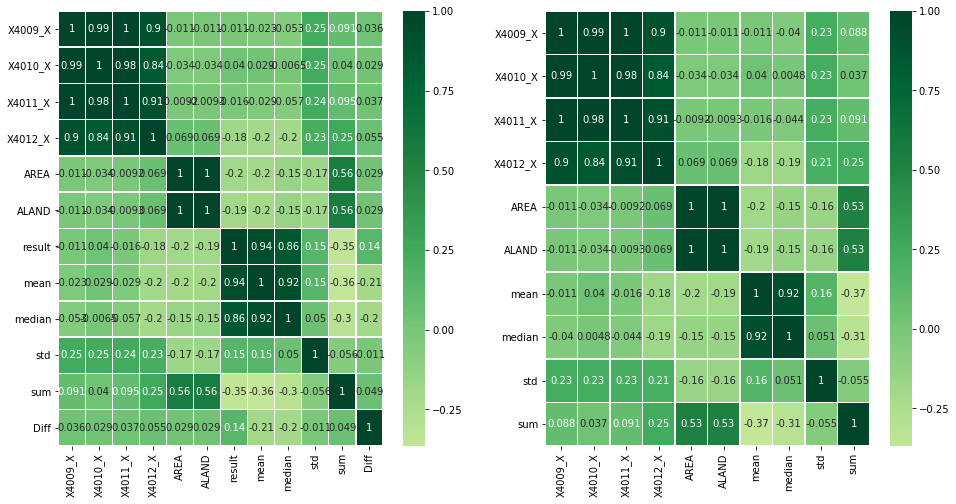

In [31]:
#import seaborn as sns
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sm08_corr_mat = small08.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(sm08_corr_mat, cmap='YlGn',  center=0, linewidths=.5,annot = True)

plt.subplot(1,2,2)
# correlation matrix visual on small data set
sm_corr_mat = all_small.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(sm_corr_mat, cmap='YlGn',  center=0, linewidths=.5,annot = True)
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
salesdata = pd.read_csv("r12_all_wZS_LTFC.csv")
salesdata_small = salesdata[["PY_ADDR_GEO_CD","list_price","ALand","AWater","COUNT","AREA","GEOID","INTPTLAT","INTPTLON","T_MEAN","TperL","F_MEAN","F_L","FxL","C_MEAN","L_MEAN"]]
salesID = salesdata[["GEOID","L_MEAN"]]

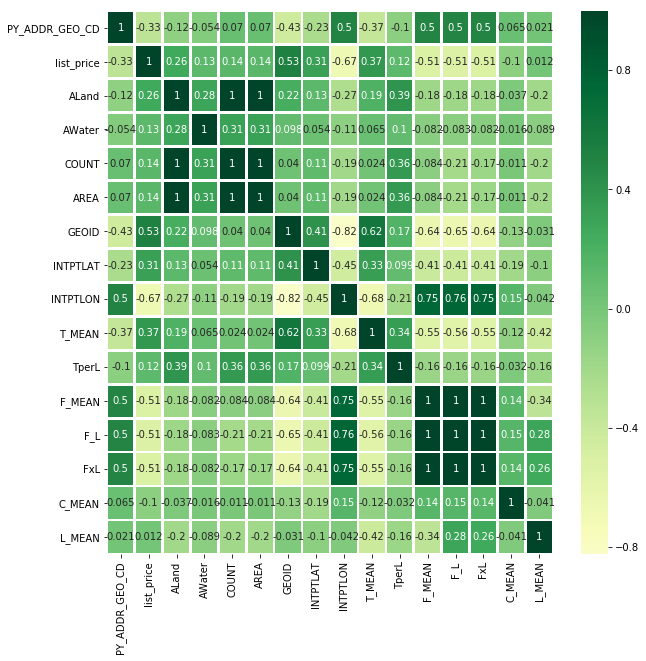

In [35]:
import seaborn as sns
plt.figure(figsize= (10,10))
sales_corr_mat = salesdata_small.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(sales_corr_mat, cmap='YlGn',  center=0, linewidths=1.5,annot = True)
plt.show()

#Sales_corr_mat

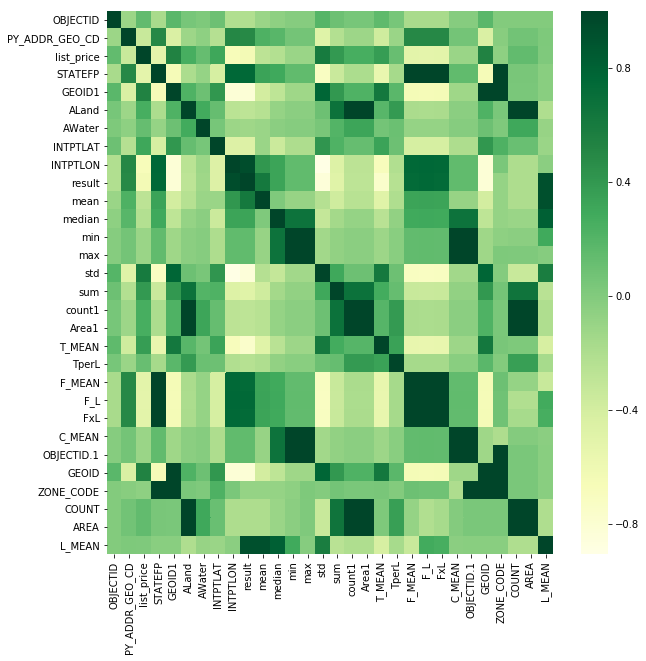

In [12]:
plt.figure(figsize=(10,10))
sales_corr_mat = salesdata.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(sales_corr_mat, cmap='YlGn')
plt.show()

In [4]:
#sales_ba_data = pd.merge(salesdata, data, left_on="GEOID", right_on="ID", how="inner")
#sales_ba_data
#sales_ba_data.to_csv('sales_ba_data.csv',index = False)
sales_ba_data= pd.read_csv('sales_ba_data.csv')
sales_ba_data.info()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91375 entries, 0 to 91374
Columns: 2252 entries, table to Shape_Area
dtypes: float64(1487), int64(733), object(32)
memory usage: 1.5+ GB


In [71]:
plot_state(sales_ba_data,var = "list_price", Type = "mean")



In [51]:
plot_state(sales_ba_data,var = "list_price", Type = "sum")


In [5]:
plot_state(sales_ba_data,var = "ALand", Type = "mean")

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [6]:
plot_state(sales_ba_data,var = "ALand", Type = "sum")

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [7]:
plot_state(sales_ba_data,var = "AWater", Type = "mean")

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [8]:
plot_state(sales_ba_data,var = "AWater", Type = "sum")

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [55]:
# plot_state(sales_ba_data,var = "ALand", Type = "sum")
?folium.Map(）

In [37]:
state_mean.head()

list_price State
STATE_NAME                    
Alabama     41495.838298    AL
Arizona     54077.902230    AZ
Arkansas    42710.672034    AR
California  56229.958422    CA
Colorado    49755.438696    CO

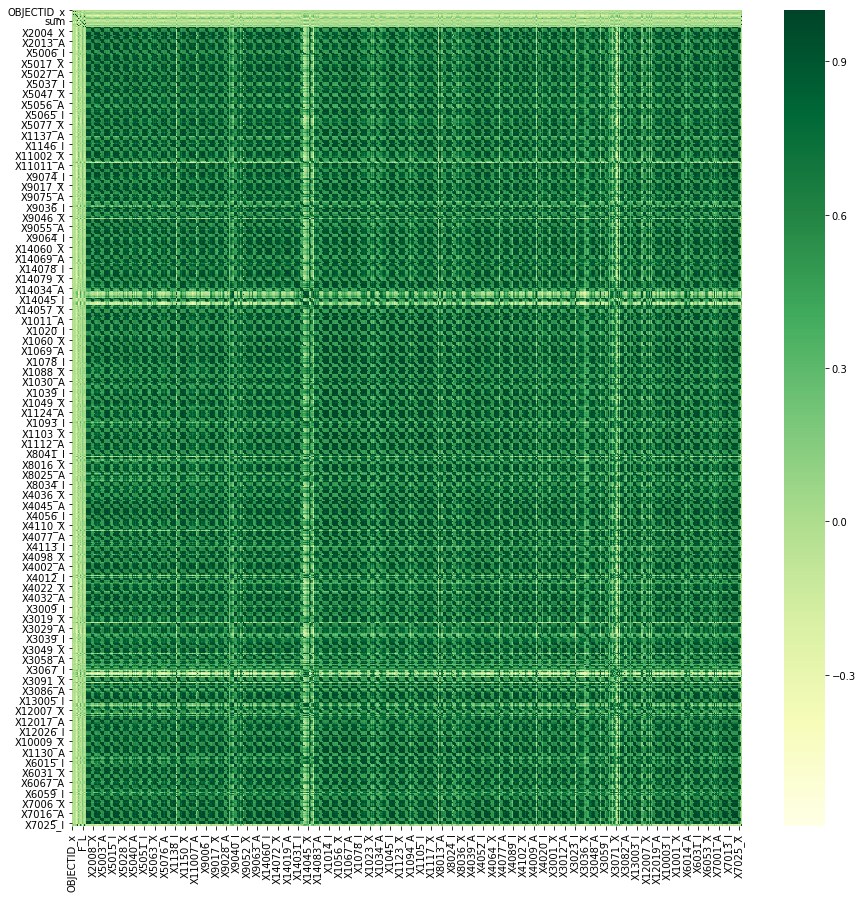

In [10]:
#Sales_BA_corr_mat = sales_ba_data.select_dtypes(include=['float64','int64']).corr()
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(Sales_BA_corr_mat, cmap='YlGn')
plt.show()

In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
AS = pd.read_csv("LawnTreesGEOID.csv")

In [2]:
AS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215880 entries, 0 to 215879
Data columns (total 40 columns):
OBJECTID                           215880 non-null int64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_1     215880 non-null int64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_2     215880 non-null int64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_3     215880 non-null int64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_4     215880 non-null int64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_5     215880 non-null int64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_6     215880 non-null object
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_7     215880 non-null object
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_8     215880 non-null object
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_9     215880 non-null float64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_10    215880 non-null float64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_11    215880 non-null float64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_12    215880 non-null float64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_13    215880 non-null float64
BG_ZS_17_LTFC_BG_ZS_17_LTF_B_14    215880 non-null float64
BG_ZS_17_LTFC_BG_ZS

In [3]:
AS.describe()

OBJECTID  BG_ZS_17_LTFC_BG_ZS_17_LTF_B_1  \
count  215880.000000                   215880.000000   
mean   107940.500000                       28.184788   
std     62319.332394                       15.670132   
min         1.000000                        1.000000   
25%     53970.750000                       13.000000   
50%    107940.500000                       28.000000   
75%    161910.250000                       41.000000   
max    215880.000000                       56.000000   

       BG_ZS_17_LTFC_BG_ZS_17_LTF_B_2  BG_ZS_17_LTFC_BG_ZS_17_LTF_B_3  \
count                   215880.000000                   215880.000000   
mean                        86.384232                   262300.955197   
std                         99.458253                   351158.830834   
min                          1.000000                      100.000000   
25%                         29.000000                    10400.000000   
50%                         61.000000                    46405.000000   
75%                        109.000000                   482502.000000   
max                        840.000000                   992201.000000   

       BG_ZS_17_LTFC_BG_ZS_17_LTF_B_4  BG_ZS_17_LTFC_BG_ZS_17_LTF_B_5  \
count                   215880.000000                    2.158800e+05   
mean                         2.223634                    2.827143e+11   
std                          1.194986                    1.569338e+11   
min                          0.000000                    1.001020e+10   
25%                          1.000000                    1.312101e+11   
50%                          2.000000                    2.812102e+11   
75%                          3.000000                    4.105100e+11   
max                          9.000000                    5.604595e+11   

       BG_ZS_17_LTFC_BG_ZS_17_LTF_B_9  BG_ZS_17_LTFC_BG_ZS_17_LTF_B_10  \
count                    2.158800e+05                     2.158800e+05   
mean                     3.545394e+07                     1.982242e+06   
std                      2.579897e+08                     5.583716e+07   
min                      0.000000e+00                     0.000000e+00   
25%                      4.913422e+05                     0.000000e+00   
50%                      1.317824e+06                     0.000000e+00   
75%                      8.902767e+06                     8.109525e+04   
max                      1.943231e+10                     1.183338e+10   

       BG_ZS_17_LTFC_BG_ZS_17_LTF_B_11  BG_ZS_17_LTFC_BG_ZS_17_LTF_B_12  \
count                    215880.000000                    215880.000000   
mean                         37.921887                       -91.063938   
std                           4.898509                        15.368005   
min                          24.547199                      -124.635404   
25%                          34.062985                       -97.542244   
50%                          39.004739                       -86.851072   
75%                          41.507519                       -79.897650   
max                          48.996396                       -66.998075   

           ...       TurfCheck_ZS_ZONE_CODE  TurfCheck_ZS_COUNT  \
count      ...                215880.000000        2.158800e+05   
mean       ...                107940.500000        4.158980e+04   
std        ...                 62319.332394        2.962573e+05   
min        ...                     1.000000        4.000000e+00   
25%        ...                 53970.750000        5.600000e+02   
50%        ...                107940.500000        1.538000e+03   
75%        ...                161910.250000        1.069750e+04   
max        ...                215880.000000        2.167716e+07   

       TurfCheck_ZS_AREA  TurfCheck_ZS_MEAN   Shape_Length    Shape_Area  \
count       2.158800e+05      215880.000000  215880.000000  2.158800e+05   
mean        3.743082e+07          34.507485       0.167642  3.936059e-03   
std         2.66

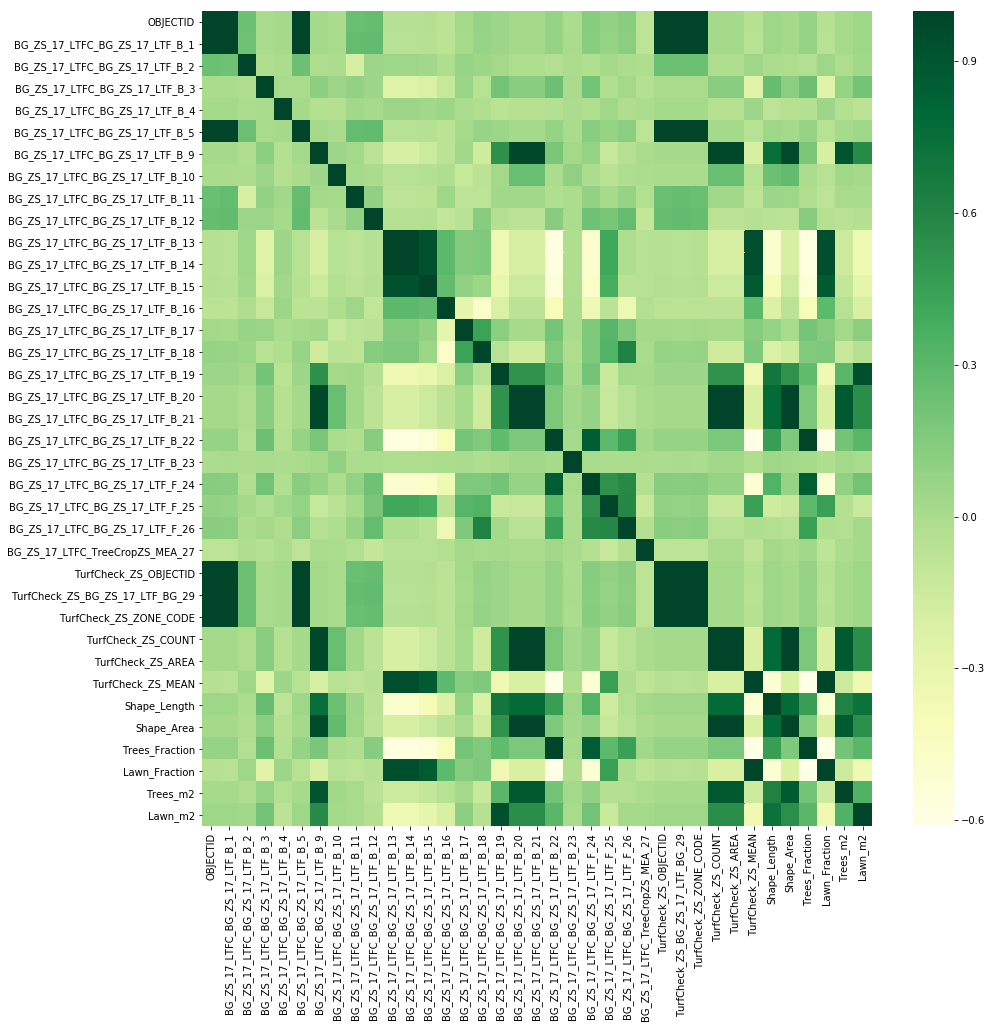

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
AS_corr_mat = AS.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(AS_corr_mat, cmap='YlGn')
plt.show()

In [ ]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 